In [10]:
import glob,os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Input, Lambda, Flatten,Conv2D,MaxPooling2D,Conv2DTranspose,UpSampling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import sklearn as sk
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
# matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.model_selection import KFold

plt.rcParams["figure.figsize"] = (2.04,2.10)                  #changes width and height respectively
plt.rcParams.update({'font.size': 16})
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
import csv
import re
import cv2
import PIL
from PIL import Image
from numpy import asarray
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Model

# IMAGE DATA-LOADING

In [11]:
y = []
for i in range(1,79):
    
    img = Image.open('/home/tarak/Ayush/results/grey/{0}.png'.format(i))
    #print(img.filename)

    data = asarray(img)
    #print(type(data))
    #print(data.shape)
    data = data/255
    #data.resize(128,128)
    #print(data.shape)
    y.append(data)
    #print(type(data))
    #print(data.shape)
    #print(np.max(data))
    
    
array=np.asarray(y)
array.resize(78,64,64)
array.shape

(78, 64, 64)

# TEST-TRAIN SPLIT

In [12]:
train_x, test_x =train_test_split(array , test_size = 0.2, random_state = 42, shuffle = True)

# TRAIN_X IMAGES

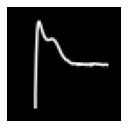

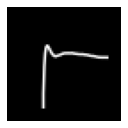

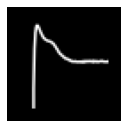

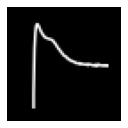

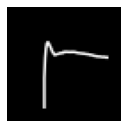

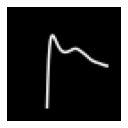

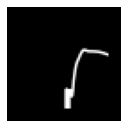

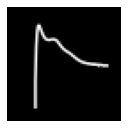

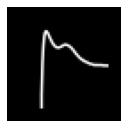

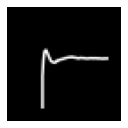

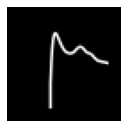

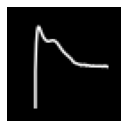

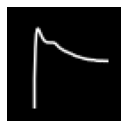

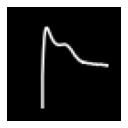

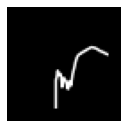

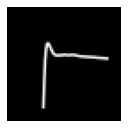

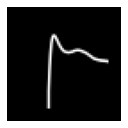

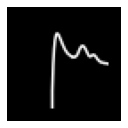

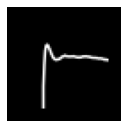

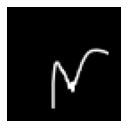

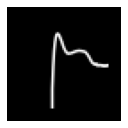

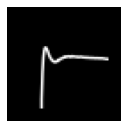

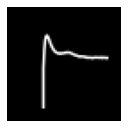

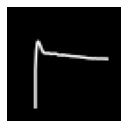

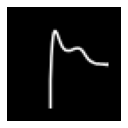

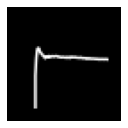

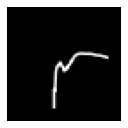

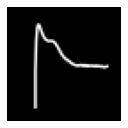

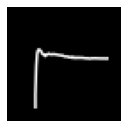

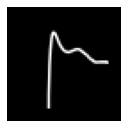

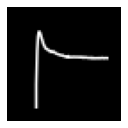

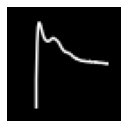

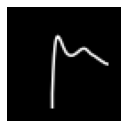

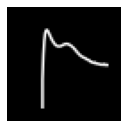

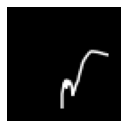

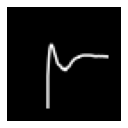

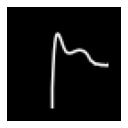

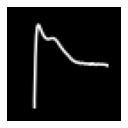

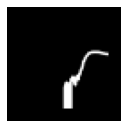

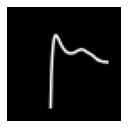

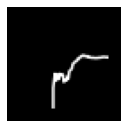

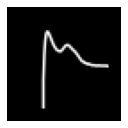

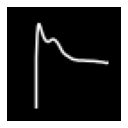

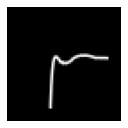

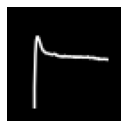

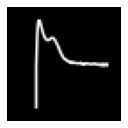

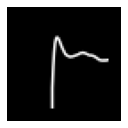

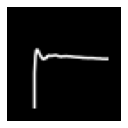

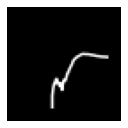

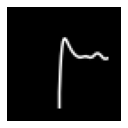

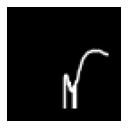

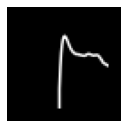

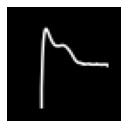

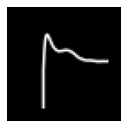

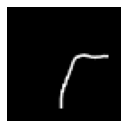

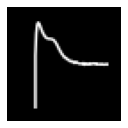

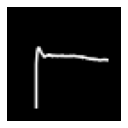

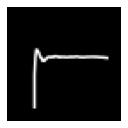

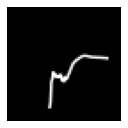

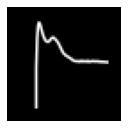

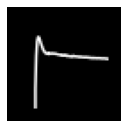

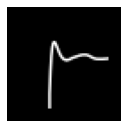

In [13]:
for i in range(0,62):
    image = train_x[i]
    image = image*255
    #image.shape
    data = Image.fromarray(image)
    fig, ax = plt.subplots()
    ax.axis("off")
    plt.imshow(data)
    plt.show()

# TEST_X IMAGES

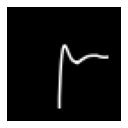

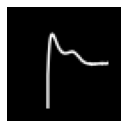

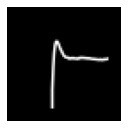

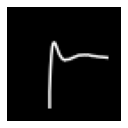

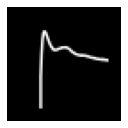

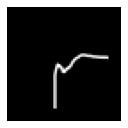

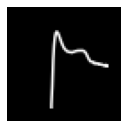

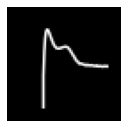

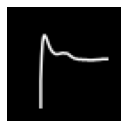

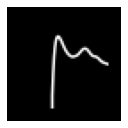

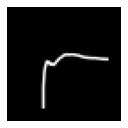

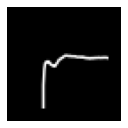

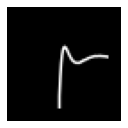

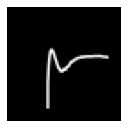

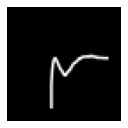

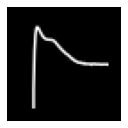

In [14]:
for i in range(0,16):
    image = test_x[i]
    image = image*255
    #image.shape
    data = Image.fromarray(image)
    fig, ax = plt.subplots()
    ax.axis("off")
    plt.imshow(data)
    plt.show()

In [15]:
print('Shape before resizing')
print('Array shape  :',array.shape)
print('train_x shape:',train_x.shape)
print('test_x shape :',test_x.shape)
array.resize(78,64,64,1)
train_x.resize(62,64,64,1)
test_x.resize(16,64,64,1)
print('Shape after resizing')
print('Array shape  :',array.shape)
print('train_x shape:',train_x.shape)
print('test_x shape :',test_x.shape)

Shape before resizing
Array shape  : (78, 64, 64)
train_x shape: (62, 64, 64)
test_x shape : (16, 64, 64)
Shape after resizing
Array shape  : (78, 64, 64, 1)
train_x shape: (62, 64, 64, 1)
test_x shape : (16, 64, 64, 1)


# AUTO-ENCODER

In [16]:
input_layer = Input(shape=(64, 64, 1), name="INPUT")
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

code_layer = MaxPooling2D((2, 2), name="CODE")(x)

x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same',name = "DECODE")(code_layer)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
output_layer = Conv2D(1, (3, 3), padding='same', name="OUTPUT")(x)


# AUTO-ENCODER MODEL

In [17]:
AE = Model(input_layer, output_layer)
AE.compile(optimizer=Adam(learning_rate= 0.00008), loss='mse')
AE.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        9248

# TRAINING THE AUTOENCODER

In [18]:
history = AE.fit(train_x, train_x,
                epochs=1000,validation_split = 0.3,
                batch_size=8,
                shuffle=True)

Epoch 1/1000
6/6 [==============================] - 1s 127ms/step - loss: 0.0245 - val_loss: 0.0231
Epoch 2/1000
6/6 [==============================] - 1s 82ms/step - loss: 0.0242 - val_loss: 0.0229
Epoch 3/1000
6/6 [==============================] - 0s 81ms/step - loss: 0.0239 - val_loss: 0.0226
Epoch 4/1000
6/6 [==============================] - 1s 94ms/step - loss: 0.0236 - val_loss: 0.0224
Epoch 5/1000
6/6 [==============================] - 1s 82ms/step - loss: 0.0234 - val_loss: 0.0223
Epoch 6/1000
6/6 [==============================] - 0s 82ms/step - loss: 0.0233 - val_loss: 0.0222
Epoch 7/1000
6/6 [==============================] - 0s 82ms/step - loss: 0.0232 - val_loss: 0.0221
Epoch 8/1000
6/6 [==============================] - 0s 81ms/step - loss: 0.0230 - val_loss: 0.0219
Epoch 9/1000
6/6 [==============================] - 0s 81ms/step - loss: 0.0229 - val_loss: 0.0217
Epoch 10/1000
6/6 [==============================] - 0s 81ms/step - loss: 0.0226 - val_loss: 0.0215
Epoch 11

Epoch 83/1000
6/6 [==============================] - 0s 81ms/step - loss: 0.0125 - val_loss: 0.0137
Epoch 84/1000
6/6 [==============================] - 0s 82ms/step - loss: 0.0125 - val_loss: 0.0137
Epoch 85/1000
6/6 [==============================] - 0s 81ms/step - loss: 0.0124 - val_loss: 0.0136
Epoch 86/1000
6/6 [==============================] - 0s 81ms/step - loss: 0.0123 - val_loss: 0.0136
Epoch 87/1000
6/6 [==============================] - 0s 81ms/step - loss: 0.0123 - val_loss: 0.0137
Epoch 88/1000
6/6 [==============================] - 0s 81ms/step - loss: 0.0122 - val_loss: 0.0136
Epoch 89/1000
6/6 [==============================] - 0s 81ms/step - loss: 0.0122 - val_loss: 0.0136
Epoch 90/1000
6/6 [==============================] - 0s 81ms/step - loss: 0.0121 - val_loss: 0.0136
Epoch 91/1000
6/6 [==============================] - 0s 81ms/step - loss: 0.0121 - val_loss: 0.0136
Epoch 92/1000
6/6 [==============================] - 0s 82ms/step - loss: 0.0121 - val_loss: 0.0135


6/6 [==============================] - 1s 83ms/step - loss: 0.0098 - val_loss: 0.0124
Epoch 165/1000
6/6 [==============================] - 1s 82ms/step - loss: 0.0098 - val_loss: 0.0126
Epoch 166/1000
6/6 [==============================] - 0s 83ms/step - loss: 0.0098 - val_loss: 0.0127
Epoch 167/1000
6/6 [==============================] - 1s 83ms/step - loss: 0.0098 - val_loss: 0.0125
Epoch 168/1000
6/6 [==============================] - 0s 82ms/step - loss: 0.0098 - val_loss: 0.0125
Epoch 169/1000
6/6 [==============================] - 1s 82ms/step - loss: 0.0098 - val_loss: 0.0125
Epoch 170/1000
6/6 [==============================] - 0s 82ms/step - loss: 0.0097 - val_loss: 0.0124
Epoch 171/1000
6/6 [==============================] - 0s 81ms/step - loss: 0.0097 - val_loss: 0.0124
Epoch 172/1000
6/6 [==============================] - 0s 81ms/step - loss: 0.0097 - val_loss: 0.0126
Epoch 173/1000
6/6 [==============================] - 0s 82ms/step - loss: 0.0097 - val_loss: 0.0125
Epoch

6/6 [==============================] - 0s 79ms/step - loss: 0.0088 - val_loss: 0.0122
Epoch 246/1000
6/6 [==============================] - 0s 80ms/step - loss: 0.0087 - val_loss: 0.0122
Epoch 247/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0088 - val_loss: 0.0122
Epoch 248/1000
6/6 [==============================] - 0s 79ms/step - loss: 0.0088 - val_loss: 0.0123
Epoch 249/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0088 - val_loss: 0.0122
Epoch 250/1000
6/6 [==============================] - 0s 78ms/step - loss: 0.0088 - val_loss: 0.0121
Epoch 251/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0087 - val_loss: 0.0120
Epoch 252/1000
6/6 [==============================] - 0s 79ms/step - loss: 0.0086 - val_loss: 0.0122
Epoch 253/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0087 - val_loss: 0.0121
Epoch 254/1000
6/6 [==============================] - 0s 78ms/step - loss: 0.0087 - val_loss: 0.0121
Epoch

6/6 [==============================] - 0s 77ms/step - loss: 0.0079 - val_loss: 0.0118
Epoch 327/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0079 - val_loss: 0.0120
Epoch 328/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0079 - val_loss: 0.0119
Epoch 329/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0079 - val_loss: 0.0117
Epoch 330/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0080 - val_loss: 0.0119
Epoch 331/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0080 - val_loss: 0.0119
Epoch 332/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0080 - val_loss: 0.0118
Epoch 333/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0079 - val_loss: 0.0120
Epoch 334/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0079 - val_loss: 0.0118
Epoch 335/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0079 - val_loss: 0.0121
Epoch

6/6 [==============================] - 0s 77ms/step - loss: 0.0075 - val_loss: 0.0117
Epoch 408/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0075 - val_loss: 0.0118
Epoch 409/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0075 - val_loss: 0.0117
Epoch 410/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0075 - val_loss: 0.0117
Epoch 411/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0075 - val_loss: 0.0116
Epoch 412/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0075 - val_loss: 0.0117
Epoch 413/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0075 - val_loss: 0.0116
Epoch 414/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0075 - val_loss: 0.0117
Epoch 415/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0074 - val_loss: 0.0116
Epoch 416/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0074 - val_loss: 0.0117
Epoch

6/6 [==============================] - 0s 77ms/step - loss: 0.0070 - val_loss: 0.0116
Epoch 489/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0070 - val_loss: 0.0117
Epoch 490/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0070 - val_loss: 0.0116
Epoch 491/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0072 - val_loss: 0.0117
Epoch 492/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0070 - val_loss: 0.0117
Epoch 493/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0071 - val_loss: 0.0116
Epoch 494/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0070 - val_loss: 0.0116
Epoch 495/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0070 - val_loss: 0.0117
Epoch 496/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0070 - val_loss: 0.0117
Epoch 497/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0070 - val_loss: 0.0117
Epoch

6/6 [==============================] - 0s 77ms/step - loss: 0.0067 - val_loss: 0.0115
Epoch 570/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0067 - val_loss: 0.0116
Epoch 571/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0067 - val_loss: 0.0115
Epoch 572/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0066 - val_loss: 0.0114
Epoch 573/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0066 - val_loss: 0.0115
Epoch 574/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0066 - val_loss: 0.0115
Epoch 575/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0066 - val_loss: 0.0115
Epoch 576/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0066 - val_loss: 0.0116
Epoch 577/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0066 - val_loss: 0.0115
Epoch 578/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0066 - val_loss: 0.0115
Epoch

6/6 [==============================] - 0s 77ms/step - loss: 0.0064 - val_loss: 0.0118
Epoch 651/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0064 - val_loss: 0.0115
Epoch 652/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0065 - val_loss: 0.0117
Epoch 653/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0065 - val_loss: 0.0113
Epoch 654/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0064 - val_loss: 0.0114
Epoch 655/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0064 - val_loss: 0.0116
Epoch 656/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0064 - val_loss: 0.0112
Epoch 657/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0064 - val_loss: 0.0113
Epoch 658/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0063 - val_loss: 0.0116
Epoch 659/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0063 - val_loss: 0.0114
Epoch

6/6 [==============================] - 0s 77ms/step - loss: 0.0061 - val_loss: 0.0112
Epoch 732/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0061 - val_loss: 0.0115
Epoch 733/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0060 - val_loss: 0.0113
Epoch 734/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0060 - val_loss: 0.0113
Epoch 735/1000
6/6 [==============================] - 0s 78ms/step - loss: 0.0060 - val_loss: 0.0113
Epoch 736/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0060 - val_loss: 0.0112
Epoch 737/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0061 - val_loss: 0.0115
Epoch 738/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0061 - val_loss: 0.0113
Epoch 739/1000
6/6 [==============================] - 0s 78ms/step - loss: 0.0060 - val_loss: 0.0114
Epoch 740/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0060 - val_loss: 0.0114
Epoch

6/6 [==============================] - 0s 76ms/step - loss: 0.0059 - val_loss: 0.0115
Epoch 813/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0058 - val_loss: 0.0116
Epoch 814/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0058 - val_loss: 0.0114
Epoch 815/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0057 - val_loss: 0.0113
Epoch 816/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0058 - val_loss: 0.0115
Epoch 817/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0057 - val_loss: 0.0113
Epoch 818/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0057 - val_loss: 0.0114
Epoch 819/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0057 - val_loss: 0.0112
Epoch 820/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0057 - val_loss: 0.0115
Epoch 821/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0057 - val_loss: 0.0113
Epoch

6/6 [==============================] - 0s 77ms/step - loss: 0.0055 - val_loss: 0.0113
Epoch 894/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0055 - val_loss: 0.0112
Epoch 895/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0055 - val_loss: 0.0113
Epoch 896/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0054 - val_loss: 0.0113
Epoch 897/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0055 - val_loss: 0.0114
Epoch 898/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0054 - val_loss: 0.0113
Epoch 899/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0055 - val_loss: 0.0113
Epoch 900/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0055 - val_loss: 0.0114
Epoch 901/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0054 - val_loss: 0.0113
Epoch 902/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0054 - val_loss: 0.0113
Epoch

6/6 [==============================] - 0s 76ms/step - loss: 0.0055 - val_loss: 0.0114
Epoch 975/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0054 - val_loss: 0.0116
Epoch 976/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0054 - val_loss: 0.0112
Epoch 977/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0054 - val_loss: 0.0118
Epoch 978/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0054 - val_loss: 0.0118
Epoch 979/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0054 - val_loss: 0.0114
Epoch 980/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0053 - val_loss: 0.0116
Epoch 981/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0053 - val_loss: 0.0112
Epoch 982/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0053 - val_loss: 0.0115
Epoch 983/1000
6/6 [==============================] - 0s 76ms/step - loss: 0.0053 - val_loss: 0.0112
Epoch

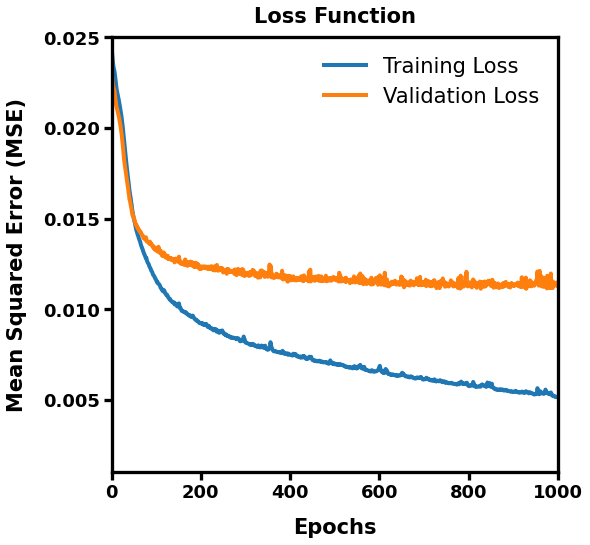

In [20]:
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams['axes.linewidth'] = 3.3

 
plt.plot(history.history['loss'],linewidth= 4,color="#1f77b4", label ='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth = 4,color = '#ff7f0e')

ax = plt.gca()
ax.set_xlim([-0, 1000])
ax.set_ylim([0.001, 0.025])

#xpoints = ypoints = plt.xlim()
#plt.plot(xpoints, ypoints, linestyle='--', color='black',label = 'y=x',linewidth=3)


plt.legend(loc='best', frameon=False,fontsize = 21)

plt.tick_params(axis='x', length=8, width = 3.3)
plt.tick_params(axis='y', length=8, width = 3.3)

plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=5)
    
plt.xticks(fontsize=18,fontweight='bold')
plt.yticks(fontsize=18,fontweight='bold')

plt.xlabel("Epochs",fontweight='bold',fontsize =21,labelpad=16)
plt.ylabel("Mean Squared Error (MSE)",fontweight='bold',fontsize = 21,labelpad = 16)

plt.title('Loss Function',fontweight='bold',fontsize =21, y=1.02)

#plt.savefig("/home/tarak/Ayush/results/Loss Function for AE.svg",bbox_inches='tight')
plt.show

plt.rcParams["figure.figsize"] = (2.04,2.10)    

# Save model

In [ ]:
AE.save("AE.h5")

# TO GET LATENT SPACE DIMENSION


In [ ]:
get_encoded= Model(inputs=AE.input, outputs=AE.get_layer("CODE").output)

# TO GET FULL DIMENSIONS FROM LATENT SPACE

In [ ]:
get_decoded= Model(inputs=AE.get_layer("DECODE").input, outputs=AE.get_layer("OUTPUT").output)

# LATENT DIMENSION FOR TEST DATA

In [ ]:
latent_space = get_encoded.predict(test_x)
#encoded_cat = encoded_cat.reshape((len(cat_test), 16*16*8))
latent_space.shape

# FULL DIMENSION FROM LATENT DIMENSION FOR TEST DATA

In [ ]:
full_dimension = get_decoded.predict(latent_space)
full_dimension.shape

In [ ]:
full_dimension.resize(16,64,64)
for i in range(0,16):
    print('Plot Number :',i+1)
    image = full_dimension[i]
    image = image*255
    data = Image.fromarray(image)
    fig, ax = plt.subplots()
    ax.axis("off")
    plt.imshow(data)
    plt.show()

# RECONSTRUCTED RDF FOR TEST DATA 

In [ ]:
reconstructed_rdf = AE.predict(test_x)

In [ ]:
reconstructed_rdf.shape

# PLOTTING RECONSTRUCTED RDF

In [ ]:
reconstructed_rdf.resize(16,64,64)
test_x.resize(16,64,64)
for i in range(0,16):
    print('Plot Number :',i+1)
    image = reconstructed_rdf[i]
    image = image*255
    image_actual = test_x[i]
    image_actual = image_actual*255
    #image.shape
    data = Image.fromarray(image)
    data_actual = Image.fromarray(image_actual)
    fig, ax = plt.subplots()
    ax.axis("off")
    plt.imshow(data)
    plt.show()
    fig, ax = plt.subplots()
    ax.axis("off")
    plt.imshow(data_actual)
    plt.show()

# GETTING LATENT SPACE DIMENSION FOR ALL DATA

In [ ]:
y = get_encoded.predict(array)
y.shape

In [ ]:
%store y

# GET RDF (FOR 'PREDICTIONS') FROM MACHINE LEARNING MODEL

In [ ]:
%store -r predictions

In [ ]:
#predictions

In [ ]:
predicted_rdf = get_decoded.predict(predictions)
predicted_rdf.shape

In [ ]:
test_x.resize(16,64,64)

In [ ]:
#plt.rcParams["figure.figsize"] = (9,6)   
predicted_rdf.resize(16,64,64)
for i in range(0,16):
    print('Predicted RDF :',i+1)
    image = predicted_rdf[i]
    image = image*255
    image_actual = test_x[i]
    image_actual = image_actual*255
    data = Image.fromarray(image)
    data_actual = Image.fromarray(image_actual)
    fig, ax = plt.subplots()
    ax.axis("off")
    plt.imshow(data)
    #plt.savefig("/home/tarak/Ayush/results/predicted_rdf/{0}.svg".format(i+1),bbox_inches='tight')
    plt.show()
    print('Actual RDF :',i+1)
    fig, ax = plt.subplots()
    ax.axis("off")
    plt.imshow(data_actual)
    plt.show()
    print('\033[1m' + "----------------------------------------------------------------------------------------------")
    print('\033[1m' + "----------------------------------------------------------------------------------------------")

# R2_Score on decoded space

In [ ]:
image.shape

In [ ]:
image_actual.shape

In [ ]:
r_squared = r2_score(image, image_actual)
print('R squared value on   test  data is', r_squared)